# Getting Started With SVM

## Getting Familiar with sklearn

In preparation of implementing a machine learning classifier in the COMB-PSO algorithm, I want to play with a default SVM classifier from the scipy sklearn library. I'll practice on the supplied iris dataset.

In [39]:
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

### Exploring Iris

In [40]:
iris = datasets.load_iris()

In [41]:
type(iris)

sklearn.utils.Bunch

**NOTE:** dir(object) introspectively pulls the attributes and methods from a python object. I'm trying to see what's inside the iris dataset object.

In [42]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [43]:
print('iris.DESCR is of type: ', str(type(iris.DESCR)))
print('\n', '#'*80, '\n', sep='')
print(iris.DESCR)

iris.DESCR is of type:  <class 'str'>

################################################################################

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76   

In [44]:
print('iris.data is of type:', str(type(iris.data)))
print('\n', '#'*80, '\n', sep='')
print('iris.data shape:', str(iris.data.shape))
print('\n', '#'*80, '\n', sep='')
print('iris.data first 5 rows')
print('-----------------------')
print(iris.data[:5, :])

iris.data is of type: <class 'numpy.ndarray'>

################################################################################

iris.data shape: (150, 4)

################################################################################

iris.data first 5 rows
-----------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [45]:
print('iris.features_names is of type:', str(type(iris.feature_names)))
print('iris.feature_names length:', str(len(iris.feature_names)))
print()
print(iris.feature_names)

iris.features_names is of type: <class 'list'>
iris.feature_names length: 4

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
print('iris.target is of type:', str(type(iris.target)))
print('iris.target shape:', str(iris.target.shape))
print()
print(iris.target)

iris.target is of type: <class 'numpy.ndarray'>
iris.target shape: (150,)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [47]:
print(type(iris.target_names))
print(iris.target_names.shape)
print(iris.target_names)

<class 'numpy.ndarray'>
(3,)
['setosa' 'versicolor' 'virginica']


### Exploring the default SVM

I'll use the iris dataset to train and test a default SVM classifier and some associated methods (data splitting and cross validation)

In [48]:
# Randomly split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 12)

In [49]:
# Initialize a default SVM classifier object
clf = svm.SVC()

In [50]:
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [51]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
# Let the classifier predict the labels of the reserved test data
clf.predict(X_test)

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

In [53]:
# Display the correct labels
y_test

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

In [54]:
# Boolean vector: true if the predicted label matched the actual label for the reserved test data
np.equal(clf.predict(X_test), y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [55]:
# Return an accuracy score for the trained classifer (SVC.score() uses SVC.predict() internally)
clf.score(X_test, y_test)

0.9777777777777777

In [56]:
# Run K-Fold Cross Validation (cv = K) on the entire data set, (no reserved data)
# and assign the accuracy scores of each Cross Validation to scores
scores = cross_val_score(clf, iris.data, iris.target, cv=10)

In [57]:
print('Scores from 10-Fold CV')
print('-------------------------')
print(scores)
print()
print('Mean Score        :', str(scores.mean()))
print('Standard Deviation:', str(scores.std()))

Scores from 10-Fold CV
-------------------------
[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 1.         1.         1.        ]

Mean Score        : 0.9800000000000001
Standard Deviation: 0.030550504633038926


**Results:** The mean CV score was slightly better than the manual test above, but the individual scores that contributed were much lower. BE CAREFUL when working with smaller datasets. In this case, a 10-fold CV reserves 15 data points as test data each time. ONE incorrect classification drops the accuracy from 1 to 0.93. Be careful to consider the grain of discernment that you're limited to. In this case, you can only observe accuracy for individual runs in steps of nearly 7 percent.

**Next:** Try K from \[2, 20\] and see what it looks like

In [58]:
mean_accuracies = []
stddev_accuracies = []
for i in range(2, 21):
    scores = cross_val_score(clf, iris.data, iris.target, cv=i)
    mean_accuracies.append(scores.mean())
    stddev_accuracies.append(scores.std())
    print('Scores from {}-Fold CV'.format(i))
    print('-------------------------')
    print(scores)
    print()
    print('Mean Score        :', str(scores.mean()))
    print('Standard Deviation:', str(scores.std()))
    print('\n', '#'*80, '\n', sep='')

Scores from 2-Fold CV
-------------------------
[0.96       0.93333333]

Mean Score        : 0.9466666666666667
Standard Deviation: 0.013333333333333308

################################################################################

Scores from 3-Fold CV
-------------------------
[0.98039216 0.96078431 0.97916667]

Mean Score        : 0.9734477124183006
Standard Deviation: 0.008968340849714082

################################################################################

Scores from 4-Fold CV
-------------------------
[0.97435897 1.         0.94444444 0.97222222]

Mean Score        : 0.9727564102564104
Standard Deviation: 0.01966363495652347

################################################################################

Scores from 5-Fold CV
-------------------------
[0.96666667 1.         0.96666667 0.96666667 1.        ]

Mean Score        : 0.9800000000000001
Standard Deviation: 0.016329931618554516

#########################################################################

In [59]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

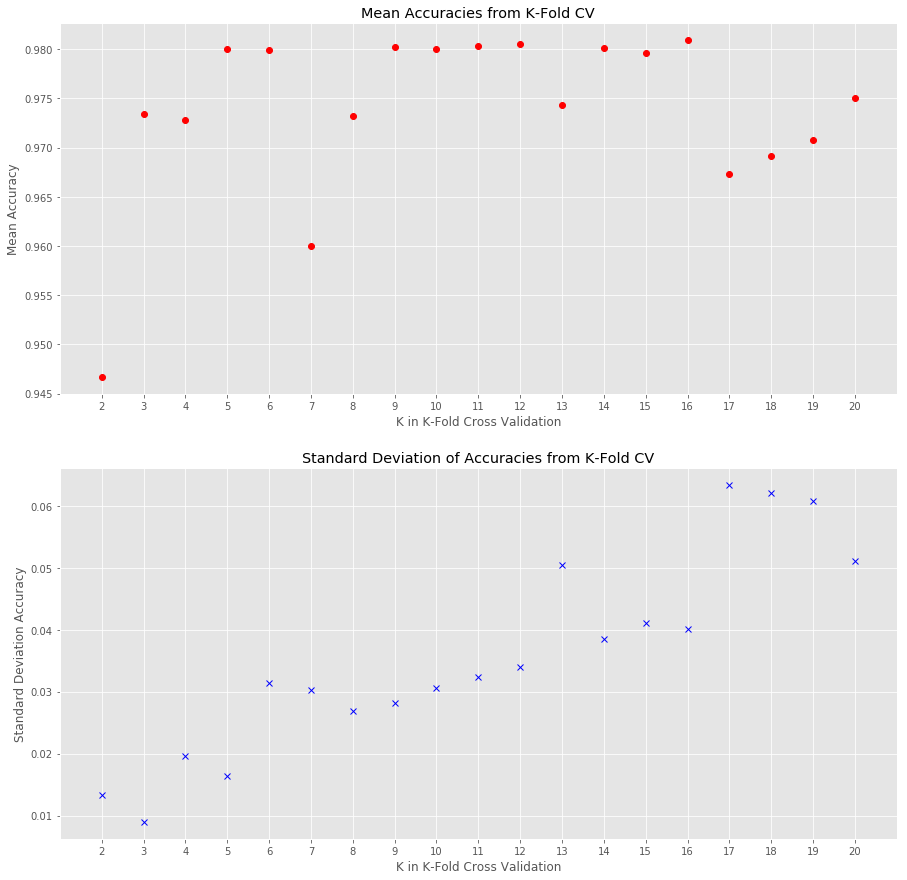

In [60]:
fig = plt.figure(figsize=(15, 15))

meanax = fig.add_subplot(211)
meanax.plot([i for i in range(2, 21)], mean_accuracies, 'ro')
meanax.set_xlabel('K in K-Fold Cross Validation')
meanax.set_xlim((1, 21))
meanax.set_xticks([i for i in range(2, 21)])
meanax.set_ylabel('Mean Accuracy')
meanax.set_title('Mean Accuracies from K-Fold CV')

stddevax = fig.add_subplot(212)
stddevax.plot([i for i in range(2, 21)], stddev_accuracies, 'bx')
stddevax.set_xlabel('K in K-Fold Cross Validation')
stddevax.set_xlim((1, 21))
stddevax.set_xticks([i for i in range(2, 21)])
stddevax.set_ylabel('Standard Deviation Accuracy')
stddevax.set_title('Standard Deviation of Accuracies from K-Fold CV')

plt.show()

**Results:** That was unexpected. I see a small upward trend in both but the mean is much more variable than I expected. Maybe I should repeat this with the kinase inhibitor data before I run it through COMB-PSO.

## Start Playing with the NTLI Data

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('working_data/Neurite_Total_Length_Input.csv')

In [63]:
df.head()

,Compound Name,"Stratified screen category (1=hit, 0=non-hit)",ABL1,ABL2,AKT1,AKT2,AKT3,ALK,AURKA,AURKB,...,TEK,TNK2,TSSK1B,TSSK2,TTK,TXK,TYK2,TYRO3,YES1,ZAP70
0,ASP3026,1,22.025,15.450,0.000,0.990,2.985,92.700,7.445,0.175,...,3.555,88.590,32.070,6.055,1.210,3.300,0.000,0.165,62.310,0.0
1,Bafetinib,1,94.970,91.785,0.000,0.000,2.115,1.945,0.000,1.280,...,1.175,0.000,10.880,2.240,0.000,6.445,0.000,0.000,39.890,0.0
2,Bisindolylmaleimide I,1,0.000,0.000,0.000,1.080,12.670,2.790,0.000,3.790,...,0.300,0.000,1.855,0.000,0.000,0.000,5.605,5.685,3.090,0.0
3,EMD1214063,1,0.000,0.000,1.925,2.565,0.000,3.255,0.000,5.020,...,0.000,0.000,0.000,1.200,0.000,2.455,2.470,6.325,2.795,0.0
4,Flt-3 Inhibitor III,1,36.300,15.345,0.000,1.320,0.000,1.670,0.000,8.850,...,1.800,1.675,0.000,0.720,3.485,1.000,5.855,7.795,19.750,0.0


Here, the Compound Name column is the name vector for the data points. Stratified screen...non-hit) is the classification vector (target labels). All the other columns are features representing percentage of kinase inhibition for each well respective to a DMSO control.

In [68]:
temp = df['Stratified screen category (1=hit, 0=non-hit)']
np.savetxt('working_data/prepped_for_classifier/temp.csv', temp.values.reshape(temp.values.shape[0]), delimiter=',')

In [26]:
# Pull out the target data and save it a separate .csv file.
target = df['Stratified screen category (1=hit, 0=non-hit)']
target.to_csv('working_data/prepped_for_classifier/target.csv', sep=',', index=False)

# Awkward bit of reformatting because the array was getting saved with \n separators instead of , for some reason.
import os
os.system("sed ':a;N;$!ba;s/\n/,/g' working_data/prepped_for_classifier/target.csv > working_data/prepped_for_classifier/newtarget.csv")
os.system("mv working_data/prepped_for_classifier/newtarget.csv working_data/prepped_for_classifier/target.csv")

0

In [27]:
# Make sure I can load the target.csv file into an ndarray object suitable for an sklearn classifier
target_vector = np.loadtxt('working_data/prepped_for_classifier/target.csv', delimiter=',', dtype=np.int8)

/home/nathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: loadtxt: Empty input file: "working_data/prepped_for_classifier/target.csv"
  


In [28]:
target_vector

array([], dtype=int8)

In [29]:
# Continue refining the dataframe to organize what I want.
# Everything left should just be features.
df.drop(['Compound Name', 'Stratified screen category (1=hit, 0=non-hit)'],
        axis=1, inplace=True)

In [30]:
df.head()

,ABL1,ABL2,AKT1,AKT2,AKT3,ALK,AURKA,AURKB,AURKC,AXL,...,TEK,TNK2,TSSK1B,TSSK2,TTK,TXK,TYK2,TYRO3,YES1,ZAP70
0,22.025,15.450,0.000,0.990,2.985,92.700,7.445,0.175,0.0,4.685,...,3.555,88.590,32.070,6.055,1.210,3.300,0.000,0.165,62.310,0.0
1,94.970,91.785,0.000,0.000,2.115,1.945,0.000,1.280,0.0,0.000,...,1.175,0.000,10.880,2.240,0.000,6.445,0.000,0.000,39.890,0.0
2,0.000,0.000,0.000,1.080,12.670,2.790,0.000,3.790,0.0,0.000,...,0.300,0.000,1.855,0.000,0.000,0.000,5.605,5.685,3.090,0.0
3,0.000,0.000,1.925,2.565,0.000,3.255,0.000,5.020,0.0,16.875,...,0.000,0.000,0.000,1.200,0.000,2.455,2.470,6.325,2.795,0.0
4,36.300,15.345,0.000,1.320,0.000,1.670,0.000,8.850,0.0,2.150,...,1.800,1.675,0.000,0.720,3.485,1.000,5.855,7.795,19.750,0.0


In [31]:
# Save the feature names in order as a separate .csv file
feature_names = list(df.columns)

import csv
with open('working_data/prepped_for_classifier/feature_names.csv', 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(feature_names)

In [32]:
# Make sure I can load the feature_names.csv file into an ndarray object suitable for an sklearn classifier
feature_names = np.loadtxt('working_data/prepped_for_classifier/feature_names.csv', dtype=str, delimiter=',')

In [33]:
feature_names

array(['ABL1', 'ABL2', 'AKT1', 'AKT2', 'AKT3', 'ALK', 'AURKA', 'AURKB',
       'AURKC', 'AXL', 'BLK', 'BMX', 'BRAF', 'BRSK1', 'BRSK2', 'BTK',
       'CAMK1D', 'CAMK2A', 'CAMK2D', 'CAMK4', 'CDC42BPA', 'CDC42BPB',
       'CDK1', 'CDK2', 'CDK3', 'CDK4', 'CDK5', 'CDK6', 'CHEK1', 'CHEK2',
       'CHUK', 'CLK2', 'CLK3', 'CSF1R', 'CSK', 'CSNK1A1', 'CSNK1G1',
       'CSNK1G2', 'CSNK1G3', 'DAPK1', 'DCLK2', 'DDR2', 'DYRK1A', 'DYRK1B',
       'DYRK2', 'EGFR', 'EPHA2', 'EPHA3', 'EPHA4', 'EPHB2', 'EPHB3',
       'EPHB4', 'ERBB2', 'ERBB4', 'FER', 'FES', 'FGFR1', 'FGFR2', 'FGFR3',
       'FGFR4', 'FGR', 'FLT1', 'FLT3', 'FLT4', 'FRK', 'FYN', 'GRK6',
       'GSK3A', 'GSK3B', 'HCK', 'HIPK1', 'IGF1R', 'IKBKB', 'IKBKE',
       'INSR', 'INSRR', 'IRAK4', 'ITK', 'JAK1', 'JAK2', 'JAK3', 'KDR',
       'KIT', 'LCK', 'LRRK2', 'LTK', 'LYN', 'MAP2K1', 'MAP4K2', 'MAP4K4',
       'MAPK1', 'MAPK11', 'MAPK12', 'MAPK13', 'MAPK14', 'MAPK3', 'MAPK9',
       'MAPKAPK2', 'MAPKAPK3', 'MAPKAPK5', 'MARK1', 'MARK2', 'MARK3',
 

In [34]:
# Export the feature data as its own separate .csv file, WITHOUT column or row labels
# so that it loads cleanly into an ndarray.
df.to_csv('working_data/prepped_for_classifier/data.csv', sep=',', header=False, index=False)

In [35]:
# Verify the import capability
data = np.loadtxt('working_data/prepped_for_classifier/data.csv', delimiter=',', dtype=np.float64)

In [36]:
data

array([[22.025, 15.45 ,  0.   , ...,  0.165, 62.31 ,  0.   ],
       [94.97 , 91.785,  0.   , ...,  0.   , 39.89 ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  5.685,  3.09 ,  0.   ],
       ...,
       [ 3.73 ,  4.64 ,  0.26 , ...,  3.72 ,  2.41 ,  0.   ],
       [ 8.44 ,  4.49 ,  0.9  , ...,  2.82 ,  2.03 ,  3.89 ],
       [ 0.   ,  0.16 ,  0.   , ...,  2.21 ,  3.03 ,  0.   ]])

In [37]:
df.head()

,ABL1,ABL2,AKT1,AKT2,AKT3,ALK,AURKA,AURKB,AURKC,AXL,...,TEK,TNK2,TSSK1B,TSSK2,TTK,TXK,TYK2,TYRO3,YES1,ZAP70
0,22.025,15.450,0.000,0.990,2.985,92.700,7.445,0.175,0.0,4.685,...,3.555,88.590,32.070,6.055,1.210,3.300,0.000,0.165,62.310,0.0
1,94.970,91.785,0.000,0.000,2.115,1.945,0.000,1.280,0.0,0.000,...,1.175,0.000,10.880,2.240,0.000,6.445,0.000,0.000,39.890,0.0
2,0.000,0.000,0.000,1.080,12.670,2.790,0.000,3.790,0.0,0.000,...,0.300,0.000,1.855,0.000,0.000,0.000,5.605,5.685,3.090,0.0
3,0.000,0.000,1.925,2.565,0.000,3.255,0.000,5.020,0.0,16.875,...,0.000,0.000,0.000,1.200,0.000,2.455,2.470,6.325,2.795,0.0
4,36.300,15.345,0.000,1.320,0.000,1.670,0.000,8.850,0.0,2.150,...,1.800,1.675,0.000,0.720,3.485,1.000,5.855,7.795,19.750,0.0


Looks good!

### Establish a baseline

Essentially, rather than assuming that my progress is starting at 0% accuracy, I'm seeing how good the classification accuracy is when I give the entire dataset to an sklearn SVM classifier with all the default settings. The project goal is to improve that accuracy as much as possible, first by feature selection, then by tuning the SVM (feature selection seems likely to contribute to overfitting).

In [38]:
# Randomly split the full dataset into 70% training data and 30% test data
# K prefix is for Kinase
KX_train, KX_test, Ky_train, Ky_test = train_test_split(data, target_vector, test_size = 0.3, random_state = 12)

ValueError: Found input variables with inconsistent numbers of samples: [256, 0]

In [ ]:
# Initialize a classifier object
Kclf = svm.SVC()

In [ ]:
# Train the classifier on the training data
Kclf.fit(KX_train, Ky_train)

In [ ]:
# Let the classifier predict the labels of the reserved test data
Kclf.predict(KX_test)

In [ ]:
# Display the correct labels
Ky_test

In [ ]:
# Boolean vector: true if the predicted label matched the actual label for the reserved test data
np.equal(Kclf.predict(KX_test), Ky_test)

In [ ]:
# Return an accuracy score for the trained classifer (SVC.score() uses SVC.predict() internally)
Kclf.score(KX_test, Ky_test)

In [ ]:
# Run K-Fold Cross Validation (cv = K) on the entire data set, (no reserved data)
# and assign the accuracy scores of each Cross Validation to scores
Kscores = cross_val_score(Kclf, data, target_vector, cv=10)

In [ ]:
print('Scores from 10-Fold CV on Kinase Inhibitors')
print('--------------------------------------------')
print(Kscores)
print()
print('Mean Score        :', str(Kscores.mean()))
print('Standard Deviation:', str(Kscores.std()))

In [ ]:
Kmean_accuracies = []
Kstddev_accuracies = []
for i in range(2, 21):
    Kscores = cross_val_score(Kclf, data, target_vector, cv=i)
    Kmean_accuracies.append(Kscores.mean())
    Kstddev_accuracies.append(Kscores.std())
    print('Scores from {}-Fold CV on Kinase Inhibitors'.format(i))
    print('-------------------------------------------')
    print(scores)
    print()
    print('Mean Score        :', str(Kscores.mean()))
    print('Standard Deviation:', str(Kscores.std()))
    print('\n', '#'*80, '\n', sep='')

In [ ]:
Kfig = plt.figure(figsize=(15, 15))

Kmeanax = Kfig.add_subplot(211)
Kmeanax.plot([i for i in range(2, 21)], Kmean_accuracies, 'ro')
Kmeanax.set_xlabel('K in K-Fold Cross Validation')
Kmeanax.set_xlim((1, 21))
Kmeanax.set_xticks([i for i in range(2, 21)])
Kmeanax.set_ylabel('Mean Accuracy')
Kmeanax.set_title('Mean Accuracies from K-Fold CV on Kinase Inhibitors')

Kstddevax = Kfig.add_subplot(212)
Kstddevax.plot([i for i in range(2, 21)], Kstddev_accuracies, 'bx')
Kstddevax.set_xlabel('K in K-Fold Cross Validation')
Kstddevax.set_xlim((1, 21))
Kstddevax.set_xticks([i for i in range(2, 21)])
Kstddevax.set_ylabel('Standard Deviation Accuracy')
Kstddevax.set_title('Standard Deviation of Accuracies from K-Fold CV on Kinase Inhibitors')

plt.show()

**Results:** Definitely a stronger upward trend than with the iris data, but if you look at the y-scales, the differences are negligible.